#**Teste Técnico - Programa Trainee triggo.ai**

Por Karine Marins

##1. Bibliotecas

In [284]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # accessing directory structure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


##2. Importando base de dados

In [285]:
#Importando base de dados
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brazilian-ecommerce


In [286]:
#Acessando base de dados
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [287]:
df_customers=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')

In [288]:
df_sellers=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')

In [289]:
df_order_reviews=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')

In [290]:
df_order_items=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')

In [291]:
df_products=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')

In [292]:
df_geolocation=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')

In [293]:
df_products_category=pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [294]:
df_orders=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

In [295]:
df_order_payments=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

##3. Análises para cada df

### 3.1 df_costumers

In [296]:
#verificando formato do dataframe
df_customers.shape

(99441, 5)

In [297]:
#verificando as informações do dataframe
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [298]:
#verificando os dados
df_customers.head(10)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7  5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8  5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9  4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
5                     89254         jaragua do sul             SC  
6                      4534              sao paulo             SP  
7                     35182                timoteo             MG  
8                     81560               curitiba             PR  
9                     30575         belo horizonte             MG

In [299]:
#Procurando por dados faltantes
#retorna true caso haja  valores do tipo NaN ou Nulo
df_customers.isnull()

customer_id  customer_unique_id  customer_zip_code_prefix  \
0            False               False                     False   
1            False               False                     False   
2            False               False                     False   
3            False               False                     False   
4            False               False                     False   
...            ...                 ...                       ...   
99436        False               False                     False   
99437        False               False                     False   
99438        False               False                     False   
99439        False               False                     False   
99440        False               False                     False   

       customer_city  customer_state  
0              False           False  
1              False           False  
2              False           False  
3              False           False  
4              False           False  
...              ...             ...  
99436          False           False  
99437          False           False  
99438          False           False  
99439          False           False  
99440          False           False  

[99441 rows x 5 columns]

In [300]:
#como não obtivemos resposta concreta, vamos utilizar outro metodo que soma a quantidade de registros faltantes
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

NÃO HÁ DADOS FALTANTES!

In [301]:
# Removendo duplicatas
df_customers = df_customers.drop_duplicates()

### 3.2 df_geolocation

In [302]:
#verificando formato do dataframe
df_geolocation.shape

(1000163, 5)

In [303]:
#verificando informações do dataframe
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [304]:
#observando os dados
df_geolocation.head(10)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   
5                         1012       -23.547762       -46.635361   
6                         1047       -23.546273       -46.641225   
7                         1013       -23.546923       -46.634264   
8                         1029       -23.543769       -46.634278   
9                         1011       -23.547640       -46.636032   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  
5        são paulo                SP  
6        sao paulo                SP  
7        sao paulo                SP  
8        sao paulo                SP  
9        sao paulo                SP

In [305]:
#Procurando por dados faltantes
#retorna true caso haja  valores do tipo NaN ou Nulo
df_geolocation.isnull()


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              False            False            False   
1                              False            False            False   
2                              False            False            False   
3                              False            False            False   
4                              False            False            False   
...                              ...              ...              ...   
1000158                        False            False            False   
1000159                        False            False            False   
1000160                        False            False            False   
1000161                        False            False            False   
1000162                        False            False            False   

         geolocation_city  geolocation_state  
0                   False              False  
1                   False              False  
2                   False              False  
3                   False              False  
4                   False              False  
...                   ...                ...  
1000158             False              False  
1000159             False              False  
1000160             False              False  
1000161             False              False  
1000162             False              False  

[1000163 rows x 5 columns]

In [306]:
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [307]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

NÃO HÁ DADOS FALTANTES!

In [308]:
# Removendo duplicatas
df_geolocation = df_geolocation.drop_duplicates()

###3.3 df_order_items


In [309]:
#verificando formato do dataframe
df_order_items.shape

(112650, 7)

In [310]:
#verificando informações presentes no dataframe
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [311]:
#verificando os dados
df_order_items.head(10)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
5  00048cc3ae777c65dbb7d2a0634bc1ea              1   
6  00054e8431b9d7675808bcb819fb4a32              1   
7  000576fe39319847cbb9d288c5617fa6              1   
8  0005a1a1728c9d785b8e2b08b904576c              1   
9  0005f50442cb953dcd1d21e1fb923495              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
5  ef92defde845ab8450f9d70c526ef70f  6426d21aca402a131fc0a5d0960a3c90   
6  8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
7  557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
8  310ae3c140ff94b03219ad0adc3c778f  a416b6a846a11724393025641d4edd5e   
9  4535b0e1091c278dfd193e5a1d63b39f  ba143b05f0110f0dc71ad71b4466ce92   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14  
5  2017-05-23 03:55:27   21.90          12.69  
6  2017-12-14 12:10:31   19.90          11.85  
7  2018-07-10 12:30:45  810.00          70.75  
8  2018-03-26 18:31:29  145.95          11.65  
9  2018-07-06 14:10:56   53.99          11.40

In [312]:
#Procurando por dados faltantes
#retorna true caso haja  valores do tipo NaN ou Nulo
df_order_items.isnull()

order_id  order_item_id  product_id  seller_id  shipping_limit_date  \
0          False          False       False      False                False   
1          False          False       False      False                False   
2          False          False       False      False                False   
3          False          False       False      False                False   
4          False          False       False      False                False   
...          ...            ...         ...        ...                  ...   
112645     False          False       False      False                False   
112646     False          False       False      False                False   
112647     False          False       False      False                False   
112648     False          False       False      False                False   
112649     False          False       False      False                False   

        price  freight_value  
0       False          False  
1       False          False  
2       False          False  
3       False          False  
4       False          False  
...       ...            ...  
112645  False          False  
112646  False          False  
112647  False          False  
112648  False          False  
112649  False          False  

[112650 rows x 7 columns]

In [313]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

NÃO HÁ DADOS FALTANTES!

In [314]:
# Removendo duplicatas
df_order_items = df_order_items.drop_duplicates()

###3.4 df_order_payments

In [315]:
 #verificando as informações presentes no df
 df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [316]:
#observando como são os dados
df_order_payments.head(10)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5  298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
6  771ee386b001f06208a7419e4fc1bbd7                   1  credit_card   
7  3d7239c394a212faae122962df514ac7                   1  credit_card   
8  1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
9  0573b5e23cbd798006520e1d5b4c6714                   1       boleto   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  
5                     2          96.12  
6                     1          81.16  
7                     3          51.84  
8                     6         341.09  
9                     1          51.95

In [317]:
#verificando existencia de dados nulos
df_order_payments.isnull()

order_id  payment_sequential  payment_type  payment_installments  \
0          False               False         False                 False   
1          False               False         False                 False   
2          False               False         False                 False   
3          False               False         False                 False   
4          False               False         False                 False   
...          ...                 ...           ...                   ...   
103881     False               False         False                 False   
103882     False               False         False                 False   
103883     False               False         False                 False   
103884     False               False         False                 False   
103885     False               False         False                 False   

        payment_value  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
103881          False  
103882          False  
103883          False  
103884          False  
103885          False  

[103886 rows x 5 columns]

In [318]:
df_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

NÃO POSSUI DADOS NULOS!

In [319]:
# Removendo duplicatas
df_order_payments = df_order_payments.drop_duplicates()

###3.5 df_order_reviews

In [320]:
#verificando formado do dataframe
df_order_reviews.shape

(99224, 7)

In [321]:
#verificando informações existentes no df
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [322]:
#observando os dados
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [323]:
#procurando por dados nulos
df_order_reviews.isnull()

review_id  order_id  review_score  review_comment_title  \
0          False     False         False                  True   
1          False     False         False                  True   
2          False     False         False                  True   
3          False     False         False                  True   
4          False     False         False                  True   
...          ...       ...           ...                   ...   
99219      False     False         False                  True   
99220      False     False         False                  True   
99221      False     False         False                  True   
99222      False     False         False                  True   
99223      False     False         False                  True   

       review_comment_message  review_creation_date  review_answer_timestamp  
0                        True                 False                    False  
1                        True                 False                    False  
2                        True                 False                    False  
3                       False                 False                    False  
4                       False                 False                    False  
...                       ...                   ...                      ...  
99219                    True                 False                    False  
99220                    True                 False                    False  
99221                   False                 False                    False  
99222                    True                 False                    False  
99223                   False                 False                    False  

[99224 rows x 7 columns]

In [324]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Esta base possui muitos dados faltantes nas colunas referentes as mensagens. Possivelmente deve se relacionar aos comentarios das entregas. Uma vez que a maior parte dos pedidos não possuem comentários. Por enquanto, vamos tratar esses dados como 0.

In [325]:
#tratando dos dados nulos
df_order_reviews.fillna(0,inplace=True)

In [326]:
df_order_reviews.isnull()

review_id  order_id  review_score  review_comment_title  \
0          False     False         False                 False   
1          False     False         False                 False   
2          False     False         False                 False   
3          False     False         False                 False   
4          False     False         False                 False   
...          ...       ...           ...                   ...   
99219      False     False         False                 False   
99220      False     False         False                 False   
99221      False     False         False                 False   
99222      False     False         False                 False   
99223      False     False         False                 False   

       review_comment_message  review_creation_date  review_answer_timestamp  
0                       False                 False                    False  
1                       False                 False                    False  
2                       False                 False                    False  
3                       False                 False                    False  
4                       False                 False                    False  
...                       ...                   ...                      ...  
99219                   False                 False                    False  
99220                   False                 False                    False  
99221                   False                 False                    False  
99222                   False                 False                    False  
99223                   False                 False                    False  

[99224 rows x 7 columns]

In [327]:
df_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Certinho, funcionou!
Por hora é suficiente.

In [328]:
# Removendo duplicatas
df_order_reviews = df_order_reviews.drop_duplicates()

###3.6 df_orders

In [329]:
#verificando formato do dataframe
df_orders.shape

(99441, 8)

In [330]:
#verificando como estao dispostas as informações
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [331]:
#observando os dados
df_orders.head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
5    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
6     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
7    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   
8    delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   
9    delivered      2017-07-29 11:55:02  2017-07-29 12:05:32   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   
5          2017-07-11 14:58:04           2017-07-26 10:57:55   
6                          NaN                           NaN   
7          2017-05-22 10:07:46           2017-05-26 12:55:51   
8          2017-01-26 14:16:31           2017-02-02 14:08:10   
9          2017-08-10 19:45:24           2017-08-16 17:14:30   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00  
5           2017-08-01 00:00:00  
6           2017-05-09 00:00:00  
7           2017-06-07 00:00:00  
8           2017-03-06 00:00:00  
9           2017-08-23 00:00:00

In [332]:
#verificando a existencia de dados nulos
df_orders.isnull()

order_id  customer_id  order_status  order_purchase_timestamp  \
0         False        False         False                     False   
1         False        False         False                     False   
2         False        False         False                     False   
3         False        False         False                     False   
4         False        False         False                     False   
...         ...          ...           ...                       ...   
99436     False        False         False                     False   
99437     False        False         False                     False   
99438     False        False         False                     False   
99439     False        False         False                     False   
99440     False        False         False                     False   

       order_approved_at  order_delivered_carrier_date  \
0                  False                         False   
1                  False                         False   
2                  False                         False   
3                  False                         False   
4                  False                         False   
...                  ...                           ...   
99436              False                         False   
99437              False                         False   
99438              False                         False   
99439              False                         False   
99440              False                         False   

       order_delivered_customer_date  order_estimated_delivery_date  
0                              False                          False  
1                              False                          False  
2                              False                          False  
3                              False                          False  
4                              False                          False  
...                              ...                            ...  
99436                          False                          False  
99437                          False                          False  
99438                          False                          False  
99439                          False                          False  
99440                          False                          False  

[99441 rows x 8 columns]

In [333]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Possui alguns bons dados faltantes. Vamos tentar visualizar onde eles estão..

In [334]:
df_orders.head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
5    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
6     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
7    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   
8    delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   
9    delivered      2017-07-29 11:55:02  2017-07-29 12:05:32   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   
5          2017-07-11 14:58:04           2017-07-26 10:57:55   
6                          NaN                           NaN   
7          2017-05-22 10:07:46           2017-05-26 12:55:51   
8          2017-01-26 14:16:31           2017-02-02 14:08:10   
9          2017-08-10 19:45:24           2017-08-16 17:14:30   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00  
5           2017-08-01 00:00:00  
6           2017-05-09 00:00:00  
7           2017-06-07 00:00:00  
8           2017-03-06 00:00:00  
9           2017-08-23 00:00:00

In [335]:
df_orders.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:06:07  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-14 20:02:44   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

In [336]:
# Substituindo valores ausentes com 0 para colunas numéricas,
# e com o valor mais frequente para colunas não numéricas
for column in df_orders.columns:
    if pd.api.types.is_numeric_dtype(df_orders[column]):  # Verifica se a coluna é numérica
        # Preenche os valores ausentes com 0
        df_orders[column] = df_orders[column].fillna(0)
    else:
        # Preenche valores ausentes com o valor mais frequente (moda)
        df_orders[column] = df_orders[column].fillna(df_orders[column].mode()[0])

# Verificando novamente a quantidade de valores ausentes após a substituição
print(df_orders.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [337]:
# Removendo duplicatas
df_orders = df_orders.drop_duplicates()

###3.7 df_products

In [338]:
#verificando informações presentes no df
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [339]:
#observando as informações
df_products.head(10)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   
5  41d3672d4792049fa1779bb35283ed13  instrumentos_musicais   
6  732bd381ad09e530fe0a5f457d81becb             cool_stuff   
7  2548af3e6e77a690cf3eb6368e9ab61e       moveis_decoracao   
8  37cc742be07708b53a98702e77a21a02       eletrodomesticos   
9  8c92109888e8cdf9d66dc7e463025574             brinquedos   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   
5                 60.0                       745.0                 1.0   
6                 56.0                      1272.0                 4.0   
7                 56.0                       184.0                 2.0   
8                 57.0                       163.0                 1.0   
9                 36.0                      1156.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0  
5             200.0               38.0                5.0              11.0  
6           18350.0               70.0               24.0              44.0  
7             900.0               40.0                8.0              40.0  
8             400.0               27.0               13.0              17.0  
9             600.0               17.0               10.0              12.0

In [340]:
#verificando existencia de dados nulos
df_products.isnull()

product_id  product_category_name  product_name_lenght  \
0           False                  False                False   
1           False                  False                False   
2           False                  False                False   
3           False                  False                False   
4           False                  False                False   
...           ...                    ...                  ...   
32946       False                  False                False   
32947       False                  False                False   
32948       False                  False                False   
32949       False                  False                False   
32950       False                  False                False   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           False               False             False   
1                           False               False             False   
2                           False               False             False   
3                           False               False             False   
4                           False               False             False   
...                           ...                 ...               ...   
32946                       False               False             False   
32947                       False               False             False   
32948                       False               False             False   
32949                       False               False             False   
32950                       False               False             False   

       product_length_cm  product_height_cm  product_width_cm  
0                  False              False             False  
1                  False              False             False  
2                  False              False             False  
3                  False              False             False  
4                  False              False             False  
...                  ...                ...               ...  
32946              False              False             False  
32947              False              False             False  
32948              False              False             False  
32949              False              False             False  
32950              False              False             False  

[32951 rows x 9 columns]

In [341]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Possui dados nulos, iremos então trata-los.

In [342]:
# Substituindo valores ausentes com 0 para colunas numéricas,
# e com o valor mais frequente para colunas não numéricas
for column in df_products.columns:
    if pd.api.types.is_numeric_dtype(df_products[column]):  # Verifica se a coluna é numérica
        # Preenche os valores ausentes com 0
        df_products[column] = df_products[column].fillna(0)
    else:
        # Preenche valores ausentes com o valor mais frequente (moda)
        df_products[column] = df_products[column].fillna(df_products[column].mode()[0])

# Verificando novamente a quantidade de valores ausentes após a substituição
print(df_products.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [343]:
df_products= df_products.drop_duplicates()

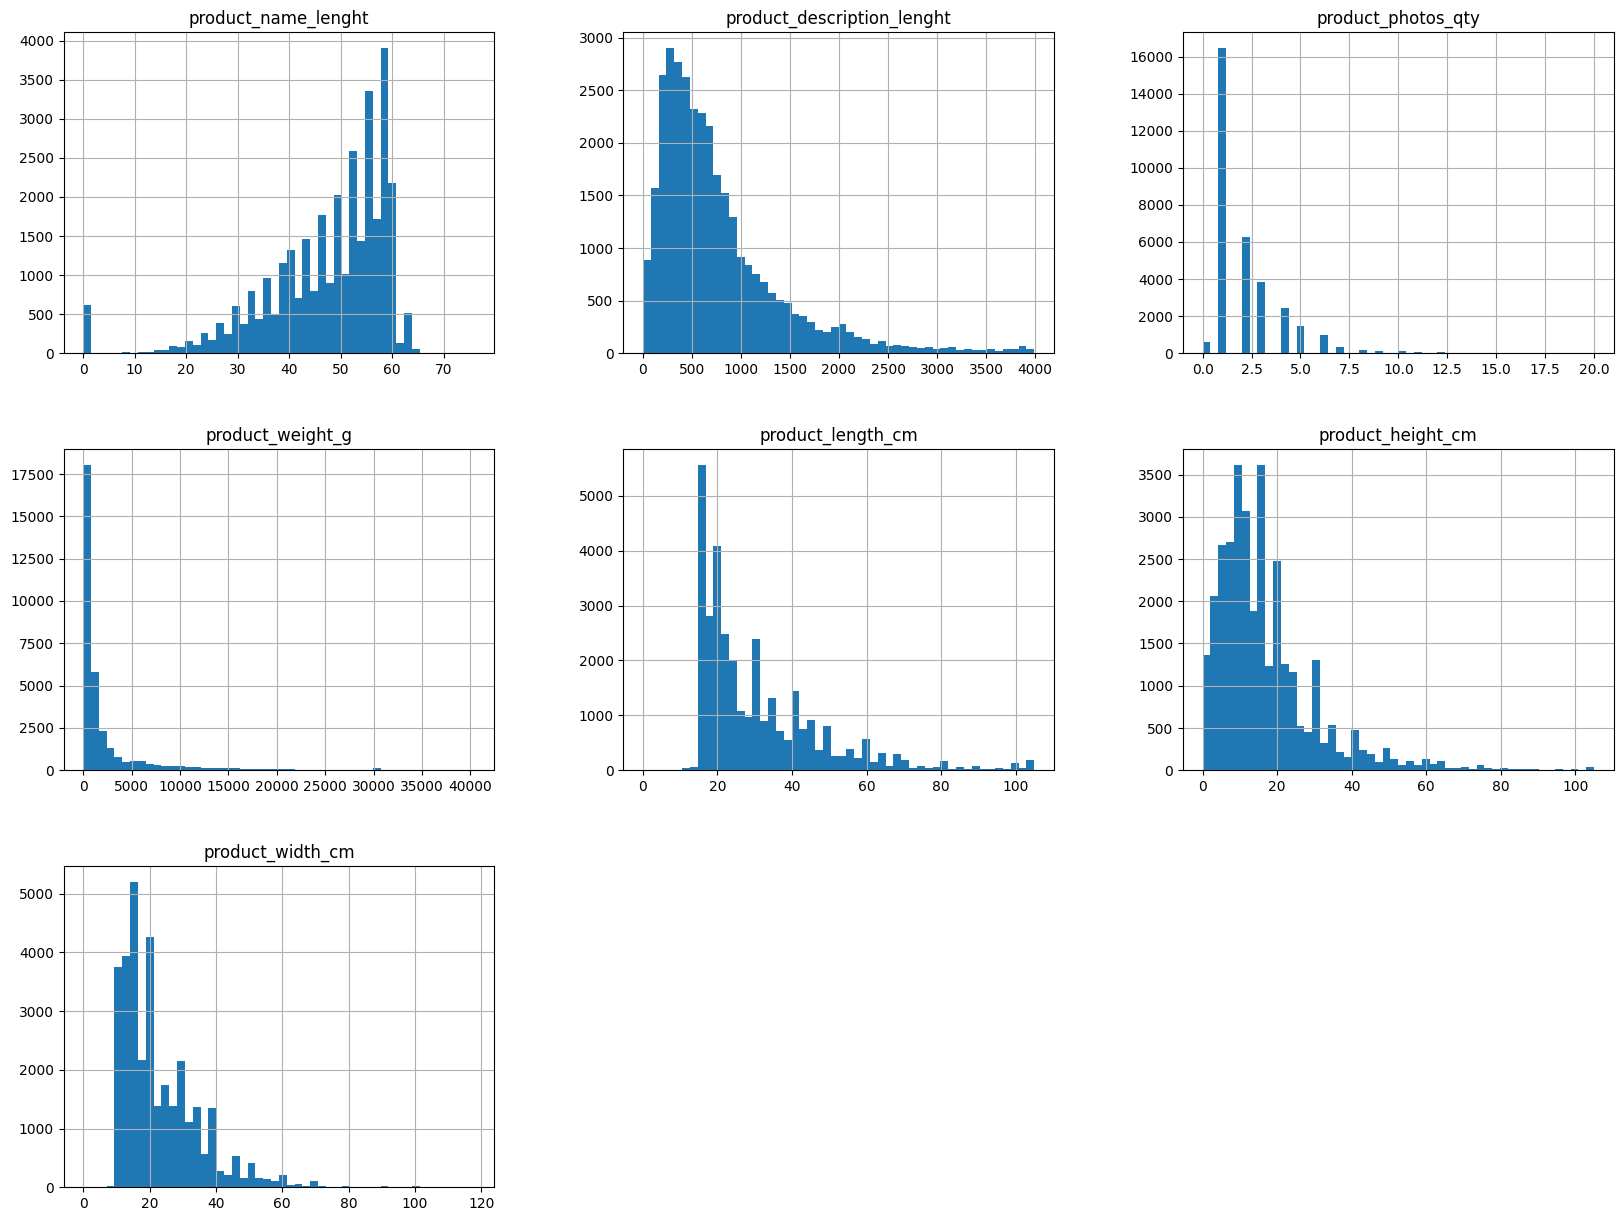

In [344]:
#utilzação de histogramas para visualização da distribuição dos valores para cada uma das colunas presentes no df
df_products.hist(bins=50, figsize=(20,15))
plt.show()

###3.8 df_sellers

In [345]:
#verificação do formato do df
df_sellers.shape

(3095, 4)

In [346]:
#informações presentes no df
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [347]:
#visualização dos df
df_sellers.head(10)

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
5  c240c4061717ac1806ae6ee72be3533b                   20920   
6  e49c26c3edfa46d227d5121a6b6e4d37                   55325   
7  1b938a7ec6ac5061a66a3766e0e75f90                   16304   
8  768a86e36ad6aae3d03ee3c6433d61df                    1529   
9  ccc4bbb5f32a6ab2b7066a4130f114e3                   80310   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
5     rio de janeiro           RJ  
6             brejao           PE  
7          penapolis           SP  
8          sao paulo           SP  
9           curitiba           PR

In [348]:
#procura por dados nulos
df_sellers.isnull()

seller_id  seller_zip_code_prefix  seller_city  seller_state
0         False                   False        False         False
1         False                   False        False         False
2         False                   False        False         False
3         False                   False        False         False
4         False                   False        False         False
...         ...                     ...          ...           ...
3090      False                   False        False         False
3091      False                   False        False         False
3092      False                   False        False         False
3093      False                   False        False         False
3094      False                   False        False         False

[3095 rows x 4 columns]

In [349]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Não possui dados faltantes.


In [350]:
df_sellers= df_sellers.drop_duplicates()

###3.9 df_products_category


In [351]:
#verificação do formato do df
df_products_category.shape


(71, 2)

In [352]:
#informações presentes no df
df_products_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [353]:
#visualização do df
df_products_category.head(10)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
5           esporte_lazer                sports_leisure
6              perfumaria                     perfumery
7   utilidades_domesticas                    housewares
8               telefonia                     telephony
9      relogios_presentes                 watches_gifts

In [354]:
#procura por dados nulos
df_products_category.isnull()

product_category_name  product_category_name_english
0                   False                          False
1                   False                          False
2                   False                          False
3                   False                          False
4                   False                          False
..                    ...                            ...
66                  False                          False
67                  False                          False
68                  False                          False
69                  False                          False
70                  False                          False

[71 rows x 2 columns]

In [355]:
df_products_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [356]:
df_products_category= df_products_category.drop_duplicates()

##4. Criação de um único df

Para elaborar um unico df deve-se localizar nos df's existentes colunas em comum. Feito isso, utiliza-se o **Método Merge **. Em suma, o método merge do pandas é utilizado para combinar dois DataFrames com base em colunas em comum, funcionando de forma semelhante a um "JOIN" em SQL. Ele permite diferentes tipos de junção, como inner, left, right e outer, possibilitando unir dados de fontes distintas conforme chaves especificadas. É amplamente usado para integrar tabelas relacionadas em uma análise de dados, garantindo consistência e facilitando a construção de um modelo relacional.

####Método merge

Antes de aplicar ao df original, faz-se testes.

In [357]:
df_order_items2 = df_order_items.copy()
teste = pd.merge(df_order_items2, df_order_payments, how = 'outer', on = 'order_id')

In [358]:
teste.head(15)

order_id  order_item_id  \
0   00010242fe8c5a6d1ba2dd792cb16214            1.0   
1   00018f77f2f0320c557190d7a144bdd3            1.0   
2   000229ec398224ef6ca0657da4fc703e            1.0   
3   00024acbcdf0a6daa1e931b038114c75            1.0   
4   00042b26cf59d7ce69dfabb4e55b4fd9            1.0   
5   00048cc3ae777c65dbb7d2a0634bc1ea            1.0   
6   00054e8431b9d7675808bcb819fb4a32            1.0   
7   000576fe39319847cbb9d288c5617fa6            1.0   
8   0005a1a1728c9d785b8e2b08b904576c            1.0   
9   0005f50442cb953dcd1d21e1fb923495            1.0   
10  00061f2a7bc09da83e415a52dc8a4af1            1.0   
11  00063b381e2406b52ad429470734ebd5            1.0   
12  0006ec9db01a64e59a68b2c340bf65a7            1.0   
13  0008288aa423d2a3f00fcb17cd7d8719            1.0   
14  0008288aa423d2a3f00fcb17cd7d8719            2.0   

                          product_id                         seller_id  \
0   4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1   e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2   c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3   7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4   ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
5   ef92defde845ab8450f9d70c526ef70f  6426d21aca402a131fc0a5d0960a3c90   
6   8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
7   557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
8   310ae3c140ff94b03219ad0adc3c778f  a416b6a846a11724393025641d4edd5e   
9   4535b0e1091c278dfd193e5a1d63b39f  ba143b05f0110f0dc71ad71b4466ce92   
10  d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   
11  f177554ea93259a5b282f24e33f65ab6  8602a61d680a10a82cceeeda0d99ea3d   
12  99a4788cb24856965c36a24e339b6058  4a3ca9315b744ce9f8e9374361493884   
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   

    shipping_limit_date   price  freight_value  payment_sequential  \
0   2017-09-19 09:45:35   58.90          13.29                 1.0   
1   2017-05-03 11:05:13  239.90          19.93                 1.0   
2   2018-01-18 14:48:30  199.00          17.87                 1.0   
3   2018-08-15 10:10:18   12.99          12.79                 1.0   
4   2017-02-13 13:57:51  199.90          18.14                 1.0   
5   2017-05-23 03:55:27   21.90          12.69                 1.0   
6   2017-12-14 12:10:31   19.90          11.85                 1.0   
7   2018-07-10 12:30:45  810.00          70.75                 1.0   
8   2018-03-26 18:31:29  145.95          11.65                 1.0   
9   2018-07-06 14:10:56   53.99          11.40                 1.0   
10  2018-03-29 22:28:09   59.99           8.88                 1.0   
11  2018-07-31 17:30:39   45.00          12.98                 1.0   
12  2018-07-26 17:24:20   74.00          23.32                 1.0   
13  2018-02-21 02:55:52   49.90          13.37                 1.0   
14  2018-02-21 02:55:52   49.90          13.37                 1.0   

   payment_type  payment_installments  payment_value  
0   credit_card                   2.0          72.19  
1   credit_card                   3.0         259.83  
2   credit_card                   5.0         216.87  
3   credit_card                   2.0          25.78  
4   credit_card                   3.0         218.04  
5        boleto                   1.0          34.59  
6   credit_card                   1.0          31.75  
7   credit_card                  10.0         880.75  
8   credit_card                   3.0         157.60  
9   credit_card                   1.0          65.39  
10  credit_card                   3.0          68.87  
11  credit_card                   5.0          57.98  
12  credit_card                   4.0          97.32  
13       boleto                   1.0         126.54  
14       boleto 

In [359]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118434 non-null  object 
 1   order_item_id         117604 non-null  float64
 2   product_id            117604 non-null  object 
 3   seller_id             117604 non-null  object 
 4   shipping_limit_date   117604 non-null  object 
 5   price                 117604 non-null  float64
 6   freight_value         117604 non-null  float64
 7   payment_sequential    118431 non-null  float64
 8   payment_type          118431 non-null  object 
 9   payment_installments  118431 non-null  float64
 10  payment_value         118431 non-null  float64
dtypes: float64(6), object(5)
memory usage: 9.9+ MB


Certo, funcionou! Logo, vamos junta-se todas que possuem order id.

In [360]:
df_com = pd.merge(df_order_items, df_order_payments, how = 'outer', on = 'order_id')

In [361]:
df_comple = pd.merge(df_com, df_order_reviews, how = 'outer', on = 'order_id')

In [362]:
df_completo =  pd.merge(df_comple, df_orders, how = 'outer', on = 'order_id')

In [363]:
df_completo.head(20)

order_id  order_item_id  \
0   00010242fe8c5a6d1ba2dd792cb16214            1.0   
1   00018f77f2f0320c557190d7a144bdd3            1.0   
2   000229ec398224ef6ca0657da4fc703e            1.0   
3   00024acbcdf0a6daa1e931b038114c75            1.0   
4   00042b26cf59d7ce69dfabb4e55b4fd9            1.0   
5   00048cc3ae777c65dbb7d2a0634bc1ea            1.0   
6   00054e8431b9d7675808bcb819fb4a32            1.0   
7   000576fe39319847cbb9d288c5617fa6            1.0   
8   0005a1a1728c9d785b8e2b08b904576c            1.0   
9   0005f50442cb953dcd1d21e1fb923495            1.0   
10  00061f2a7bc09da83e415a52dc8a4af1            1.0   
11  00063b381e2406b52ad429470734ebd5            1.0   
12  0006ec9db01a64e59a68b2c340bf65a7            1.0   
13  0008288aa423d2a3f00fcb17cd7d8719            1.0   
14  0008288aa423d2a3f00fcb17cd7d8719            2.0   
15  0009792311464db532ff765bf7b182ae            1.0   
16  0009c9a17f916a706d71784483a5d643            1.0   
17  000aed2e25dbad2f9ddb70584c5a2ded            1.0   
18  000c3e6612759851cc3cbb4b83257986            1.0   
19  000e562887b1f2006d75e0be9558292e            1.0   

                          product_id                         seller_id  \
0   4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1   e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2   c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3   7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4   ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
5   ef92defde845ab8450f9d70c526ef70f  6426d21aca402a131fc0a5d0960a3c90   
6   8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
7   557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
8   310ae3c140ff94b03219ad0adc3c778f  a416b6a846a11724393025641d4edd5e   
9   4535b0e1091c278dfd193e5a1d63b39f  ba143b05f0110f0dc71ad71b4466ce92   
10  d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   
11  f177554ea93259a5b282f24e33f65ab6  8602a61d680a10a82cceeeda0d99ea3d   
12  99a4788cb24856965c36a24e339b6058  4a3ca9315b744ce9f8e9374361493884   
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
15  8cab8abac59158715e0d70a36c807415  530ec6109d11eaaf87999465c6afee01   
16  3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
17  4fa33915031a8cde03dd0d3e8fb27f01  fe2032dab1a61af8794248c8196565c9   
18  b50c950aba0dcead2c48032a690ce817  218d46b86c1881d022bce9c68a7d4b15   
19  5ed9eaf534f6936b51d0b6c5e4d5c2e9  8cbac7e12637ed9cffa18c7875207478   

    shipping_limit_date   price  freight_value  payment_sequential  \
0   2017-09-19 09:45:35   58.90          13.29                 1.0   
1   2017-05-03 11:05:13  239.90          19.93                 1.0   
2   2018-01-18 14:48:30  199.00          17.87                 1.0   
3   2018-08-15 10:10:18   12.99          12.79                 1.0   
4   2017-02-13 13:57:51  199.90          18.14                 1.0   
5   2017-05-23 03:55:27   21.90          12.69                 1.0   
6   2017-12-14 12:10:31   19.90          11.85                 1.0   
7   2018-07-10 12:30:45  810.00          70.75                 1.0   
8   2018-03-26 18:31:29  145.95          11.65                 1.0   
9   2018-07-06 14:10:56   53.99          11.40                 1.0   
10  2018-03-29 22:28:09   59.99           8.88                 1.0   
11  2018-07-31 17:30:39   45.00          12.98                 1.0   
12  2018-07-26 17:24:20   74.00          23.32                 1.0   
13  2018-02-21 02:55:52   49.90          13.37                 1.0   
14  2018-02-21 02:55:52   49.90          13.37                 1.0   
15  2018-08-17 12:15:10   99.90          27.65                 1.0   
16  2018-05-02 09:31:53  639.00          11.34                 1.0   
17  2018-05-16 20:57:03  144.00           8.77           

In [364]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [365]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Agora junta-se o novo df criado aos demais pelo costumer_id


In [366]:
df2_com = pd.merge(df_completo, df_customers, how = 'outer', on = 'customer_id')

In [367]:
df2_com.head(7)

order_id  order_item_id  \
0  5f79b5b0931d63f1a42989eb65b9da6e            1.0   
1  a44895d095d7e0702b6a162fa2dbeced            1.0   
2  316a104623542e4d75189bb372bc5f8d            1.0   
3  5825ce2e88d5346438686b0bba99e5ee            1.0   
4  0ab7fb08086d4af9141453c91878ed7a            1.0   
5  cd3558a10d854487b4f907e9b326a4fc            1.0   
6  07f6c3baf9ac86865b60f640c4f923c6            1.0   

                         product_id                         seller_id  \
0  64315bd8c0c47303179dd2e25b579d00  7aa4334be125fcdd2ba64b3180029f14   
1  84183944dc7cddca87a5d384452c1d3c  2a1348e9addc1af5aaa619b1a3679d6b   
2  9df2b21ec85378d71df4404712e17478  46dc3b2cc0980fb8ec44634e21d2718e   
3  af3ec22cce878225aae6d9eb6c7a78eb  aafe36600ce604f205b86b5084d3d767   
4  868b3136c5b206f91b8208fbfdf2cb7c  4a3ca9315b744ce9f8e9374361493884   
5  fa23bf270fb9880690b07d09b9f9ff20  1b8356dabde1d35e17cef975c3f82730   
6  daa7499d1e545811c843e8189cd30286  e5a3438891c0bfdb9394643f95273d8e   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-11-21 16:35:32   89.80          24.94                 1.0   
1  2017-07-20 09:55:12   54.90          12.51                 1.0   
2  2017-03-06 11:15:20  179.99          15.43                 1.0   
3  2017-08-23 03:10:27  149.90          29.45                 1.0   
4  2018-04-10 03:10:19   93.00          14.01                 1.0   
5  2017-04-18 08:50:12   59.99          11.81                 1.0   
6  2018-03-08 14:10:38   34.30          15.10                 1.0   

  payment_type  payment_installments  ...  order_status  \
0  credit_card                   8.0  ...     delivered   
1  credit_card                   5.0  ...     delivered   
2  credit_card                  10.0  ...     delivered   
3       boleto                   1.0  ...     delivered   
4       boleto                   1.0  ...     delivered   
5      voucher                   1.0  ...     delivered   
6  credit_card                   4.0  ...     delivered   

  order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
0      2017-11-14 16:08:26  2017-11-14 16:35:32          2017-11-17 15:32:08   
1      2017-07-16 09:40:32  2017-07-16 09:55:12          2017-07-19 19:09:37   
2      2017-02-28 11:06:43  2017-02-28 11:15:20          2017-03-01 15:24:20   
3      2017-08-16 13:09:20  2017-08-17 03:10:27          2017-08-19 11:34:29   
4      2018-04-02 13:42:17  2018-04-04 03:10:19          2018-04-04 18:11:09   
5      2017-04-12 08:35:12  2017-04-12 08:50:12          2017-04-12 17:05:42   
6      2018-03-02 17:47:40  2018-03-03 14:10:38          2018-03-07 21:07:51   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-11-28 15:41:30           2017-12-04 00:00:00   
1           2017-07-25 18:57:33           2017-08-04 00:00:00   
2           2017-03-06 08:57:49           2017-03-22 00:00:00   
3           2017-09-13 20:06:02           2017-09-14 00:00:00   
4           2018-04-13 20:21:08           2018-04-18 00:00:00   
5           2017-04-20 16:12:26           2017-05-04 00:00:00   
6           2018-04-17 17:17:34           2018-03-22 00:00:00   

                 customer_unique_id customer_zip_code_prefix customer_city  \
0  248ffe10d632bebe4f7267f1f44844c9                     6273        osasco   
1  b0015e09bb4b6e47c52844fab5fb6638                    35550   itapecerica   
2  94b11d37cd61cb2994a194d11f89682b                    29830  nova venecia   
3  4893ad4ea28b2c5b3ddf4e82e79db9e6                    39664      mendonca   
4  0b83f73b19c2019e182fd552c048a22c                     4841     sao paulo   
5  104bdb7e6a6cdceaa88c3ea5fa6b2b93                    13272      valinhos   
6  14843983d4a159080f6afe4b7f346e7c                    24220       niteroi   

  customer_state  
0             SP  
1             MG  
2             ES  
3             MG  
4             SP  
5             SP  
6             RJ  

[7 rows x 28 columns]

In [368]:
df2_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [369]:
df2_com.shape

(119143, 28)

Feito isso, junta-se o dataframe em construção com o df de sellers, pelo seller_id


In [370]:
df2_comple = pd.merge(df2_com, df_sellers , how = 'outer', on = 'seller_id')

In [371]:
df2_comple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [372]:
df2_comple.head(7)

order_id  order_item_id  \
0  d455a8cb295653b55abda06d434ab492            1.0   
1  7f39ba4c9052be115350065d07583cac            1.0   
2  9dc8d1a6f16f1b89874c29c9d8d30447            1.0   
3  0f548bd29148ebc519d6495e37a284e1            1.0   
4  0f548bd29148ebc519d6495e37a284e1            2.0   
5  4dcbd5ebfc13eef35e0fcb0ca1c2807e            1.0   
6  99a50db34d17b1f845a8ea04de3e747d            1.0   

                         product_id                         seller_id  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
1  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
2  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
3  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
4  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
5  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
6  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-12 22:24:16  895.0          21.02                 1.0  credit_card   
1  2017-10-24 23:56:20  895.0          21.02                 1.0  credit_card   
2  2017-10-18 14:49:22  895.0          21.02                 1.0  credit_card   
3  2017-09-08 08:25:50   99.0          33.08                 1.0  credit_card   
4  2017-09-08 08:25:50   99.0          33.08                 1.0  credit_card   
5  2017-10-27 17:49:12   99.0          33.08                 1.0  credit_card   
6  2017-10-16 09:28:19   99.0          45.99                 1.0  credit_card   

   payment_installments  ...  order_delivered_carrier_date  \
0                  10.0  ...           2017-09-29 15:53:03   
1                   8.0  ...           2017-10-20 14:29:01   
2                   4.0  ...           2017-10-17 15:42:42   
3                   2.0  ...           2017-09-04 22:03:06   
4                   2.0  ...           2017-09-04 22:03:06   
5                   4.0  ...           2017-10-24 21:03:32   
6                   2.0  ...           2017-10-16 18:35:57   

  order_delivered_customer_date  order_estimated_delivery_date  \
0           2017-10-07 16:12:47            2017-10-30 00:00:00   
1           2017-10-27 16:46:05            2017-11-09 00:00:00   
2           2017-10-24 20:17:44            2017-11-06 00:00:00   
3           2017-09-08 16:26:55            2017-09-27 00:00:00   
4           2017-09-08 16:26:55            2017-09-27 00:00:00   
5           2017-11-08 18:28:44            2017-11-16 00:00:00   
6           2017-10-24 13:32:58            2017-11-09 00:00:00   

                 customer_unique_id customer_zip_code_prefix  \
0  3c7e305796add66698959fc7ad176f6b                    87502   
1  9de5797cddb92598755a0f76383ddbbb                    35490   
2  9915eb9f74b6c11aaf04833f65b00e93                    38600   
3  dce323533e45e74d215e0fe7fb114118                    24710   
4  dce323533e45e74d215e0fe7fb114118                    24710   
5  acfca8c3549ceceba9e125afc0349610                    81530   
6  6d30fb7a44f6405e3df4ec6a5a1c787c                    44670   

         customer_city customer_state seller_zip_code_prefix  seller_city  \
0             umuarama             PR                 9080.0  santo andre   
1  entre rios de minas             MG                 9080.0  santo andre   
2             paracatu             MG                 9080.0  santo andre   
3          sao goncalo             RJ                29156.0    cariacica   
4          sao goncalo             RJ                29156.0    cariacica   
5             curitiba             PR                29156.0    cariacica   
6              anguera             BA                29156.0    cariacica   

  seller_state  
0           SP  
1           SP  
2           SP  
3           ES  
4           ES  
5           ES  
6           ES  

[7 rows x 31 columns]

In [373]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Agora, junta-se pelo produto_id.

In [374]:
df2_completo = pd.merge(df2_comple, df_products , how = 'outer', on = 'product_id')

In [375]:
df2_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [376]:
df2_completo.head(7)

order_id  order_item_id  \
0  f30149f4a8882a08895b6a242aa0d612            1.0   
1  f5eda0ded77c1293b04c953138c8331d            1.0   
2  0bf736fd0fd5169d60de3699fcbcf986            1.0   
3  3aba44d8e554ab4bb8c09f6f78032ca8            1.0   
4  6f0dfb5b5398b271cc6bbd9ee263530e            1.0   
5  a6c1ae4d48280b5b3c43231ac6afd701            1.0   
6  bb9552306cf6879fde49f4ba3bd94299            2.0   

                         product_id                         seller_id  \
0  00066f42aeeb9f3007548bb9d3f33c38  5670f4db5b62c43d542e1b2d56b0cf7c   
1  00088930e925c41fd95ebfe695fd2655  7142540dd4c91e2237acb7e911c4eba2   
2  0009406fd7479715e4bef61dd91f2462  4a3ca9315b744ce9f8e9374361493884   
3  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
4  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
5  000d9be29b5207b54e86aa1b1ac54872  8ae520247981aa06bc94abddf5f46d34   
6  0011c512eb256aa0dbbb544d8dffcf6e  b4ffb71f0cb1b1c3d63fad021ecf93e1   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2018-05-24 18:58:59  101.65          18.59                 1.0   
1  2017-12-18 19:32:19  129.90          13.93                 1.0   
2  2017-12-29 16:12:36  229.00          13.10                 1.0   
3  2018-08-16 13:35:21   58.90          19.60                 1.0   
4  2018-08-07 22:15:19   58.90          19.60                 1.0   
5  2018-04-09 10:09:40  199.00          19.27                 1.0   
6  2017-12-22 20:38:29   52.00          15.80                 1.0   

  payment_type  payment_installments  ...        seller_city seller_state  \
0  credit_card                   3.0  ...          sao paulo           SP   
1  credit_card                   1.0  ...          penapolis           SP   
2  credit_card                  10.0  ...           ibitinga           SP   
3  credit_card                   4.0  ...  francisco beltrao           PR   
4  credit_card                   1.0  ...  francisco beltrao           PR   
5  credit_card                   3.0  ...         navegantes           SC   
6  credit_card                   5.0  ...          sao paulo           SP   

   product_category_name product_name_lenght product_description_lenght  \
0             perfumaria                53.0                      596.0   
1             automotivo                56.0                      752.0   
2        cama_mesa_banho                50.0                      266.0   
3  utilidades_domesticas                25.0                      364.0   
4  utilidades_domesticas                25.0                      364.0   
5     relogios_presentes                48.0                      613.0   
6             automotivo                58.0                      177.0   

  product_photos_qty product_weight_g product_length_cm product_height_cm  \
0                6.0            300.0              20.0              16.0   
1                4.0           1225.0              55.0              10.0   
2                2.0            300.0              45.0              15.0   
3                3.0            550.0              19.0              24.0   
4                3.0            550.0              19.0              24.0   
5                4.0            250.0              22.0              11.0   
6                1.0            100.0              16.0              15.0   

  product_width_cm  
0             16.0  
1             26.0  
2             35.0  
3             12.0  
4             12.0  
5             15.0  
6             16.0  

[7 rows x 39 columns]

Feito isso, faz-se necessário a análise desse df, a fim de verificar se existem dados nulos e afins.

In [377]:
#verificando dados faltantes
df2_completo.isnull()

order_id  order_item_id  product_id  seller_id  shipping_limit_date  \
0          False          False       False      False                False   
1          False          False       False      False                False   
2          False          False       False      False                False   
3          False          False       False      False                False   
4          False          False       False      False                False   
...          ...            ...         ...        ...                  ...   
119138     False           True        True       True                 True   
119139     False           True        True       True                 True   
119140     False           True        True       True                 True   
119141     False           True        True       True                 True   
119142     False           True        True       True                 True   

        price  freight_value  payment_sequential  payment_type  \
0       False          False               False         False   
1       False          False               False         False   
2       False          False               False         False   
3       False          False               False         False   
4       False          False               False         False   
...       ...            ...                 ...           ...   
119138   True           True               False         False   
119139   True           True               False         False   
119140   True           True               False         False   
119141   True           True               False         False   
119142   True           True               False         False   

        payment_installments  ...  seller_city  seller_state  \
0                      False  ...        False         False   
1                      False  ...        False         False   
2                      False  ...        False         False   
3                      False  ...        False         False   
4                      False  ...        False         False   
...                      ...  ...          ...           ...   
119138                 False  ...         True          True   
119139                 False  ...         True          True   
119140                 False  ...         True          True   
119141                 False  ...         True          True   
119142                 False  ...         True          True   

        product_category_name  product_name_lenght  \
0                       False                False   
1                       False                False   
2                       False                False   
3                       False                False   
4                       False                False   
...                       ...                  ...   
119138                   True                 True   
119139                   True                 True   
119140                   True                 True   
119141                   True                 True   
119142                   True                 True   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                            False               False             False   
1                            False               False             False   
2                            False               False             False   
3                            False               False             False   
4                            False               False             False   
...                            ...                 ...               ...   
119138                        True                True              True   
119139                        True                True              True   
119140                        True                True              True   
119141                        True                True              True   
119142      

In [378]:
df_completo.isnull().sum()

order_id                           0
order_item_id                    833
product_id                       833
seller_id                        833
shipping_limit_date              833
price                            833
freight_value                    833
payment_sequential                 3
payment_type                       3
payment_installments               3
payment_value                      3
review_id                        997
review_score                     997
review_comment_title             997
review_comment_message           997
review_creation_date             997
review_answer_timestamp          997
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
dtype: int64

In [379]:
#observando novo df
x = df2_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [380]:
#visualizando todas colunas do dataframe
x = df2_completo.columns.values
for i in x:
    print(i)

order_id
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
review_comment_title
review_comment_message
review_creation_date
review_answer_timestamp
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
seller_zip_code_prefix
seller_city
seller_state
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm


In [381]:
#verificando a quantidade de valores unicos
df2_completo['product_id'].value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    528
422879e10f46682990de24d770e7f83d    508
389d119b48cf3043d311335e499d9c6b    406
368c6c730842d78016ad823897a372db    398
                                   ... 
ffc88104d219c1b767d566fd93653dd2      1
ffc48c754b5bd736e2887e279d1dec72      1
ffbfe460c6f140cdbe4f494be6dd43be      1
ffbfa9e143fda4420454d0f4e88a3cd5      1
0009406fd7479715e4bef61dd91f2462      1
Name: count, Length: 32951, dtype: int64

In [382]:
# Substituindo valores ausentes com 0 para colunas numéricas,
# e com o valor mais frequente para colunas não numéricas
for column in df2_completo.columns:
    if pd.api.types.is_numeric_dtype(df2_completo[column]):  # Verifica se a coluna é numérica
        # Preenche os valores ausentes com 0
        df2_completo[column] = df2_completo[column].fillna(0)
    else:
        # Preenche valores ausentes com o valor mais frequente (moda)
        df2_completo[column] = df2_completo[column].fillna(df2_completo[column].mode()[0])

# Verificando novamente a quantidade de valores ausentes após a substituição
print(df2_completo.isnull().sum())

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_pref

In [383]:
df_final = df2_completo.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  119143 non-null  float64
 2   product_id                     119143 non-null  object 
 3   seller_id                      119143 non-null  object 
 4   shipping_limit_date            119143 non-null  object 
 5   price                          119143 non-null  float64
 6   freight_value                  119143 non-null  float64
 7   payment_sequential             119143 non-null  float64
 8   payment_type                   119143 non-null  object 
 9   payment_installments           119143 non-null  float64
 10  payment_value                  119143 non-null  float64
 11  review_id                      119143 non-null  object 
 12  review_score                  

Por fim, normaliza-se os dados necessários.

In [384]:
#Converter colunas de datas
colunas_datas = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in colunas_datas:
    if col in df_final.columns:
        df_final[col] = pd.to_datetime(df_final[col], errors='coerce')

In [385]:
#Converter colunas numéricas
colunas_numericas = [
    'payment_value',
    'freight_value',
    'price',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in colunas_numericas:
    if col in df_final.columns:
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')



In [386]:
#Verificar se ainda restaram valores nulos após as conversões
print("Valores nulos após tratamento:")
print(df_final[colunas_datas + colunas_numericas].isnull().sum())

Valores nulos após tratamento:
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_creation_date             0
review_answer_timestamp          0
payment_value                    0
freight_value                    0
price                            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64


In [387]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_item_id                  119143 non-null  float64       
 2   product_id                     119143 non-null  object        
 3   seller_id                      119143 non-null  object        
 4   shipping_limit_date            119143 non-null  object        
 5   price                          119143 non-null  float64       
 6   freight_value                  119143 non-null  float64       
 7   payment_sequential             119143 non-null  float64       
 8   payment_type                   119143 non-null  object        
 9   payment_installments           119143 non-null  float64       
 10  payment_value                  119143 non-null  float64       
 11  

**OBS:. VALE RESSALTAR QUE O df_geolocation NÃO FOI INSERIDO POR NÃO TER CHAVE EM COMUM!**

Passos para **preparação dos dados**:

Na etapa de preparação dos dados, todos os arquivos CSV do dataset foram inicialmente carregados e analisados individualmente, a fim de compreender suas estruturas e relações. Em seguida, foi realizado o tratamento de valores nulos, com a remoção ou o preenchimento dos dados ausentes conforme a relevância de cada coluna para a análise. Também foram identificadas e eliminadas duplicatas, garantindo a integridade das informações. Após essas etapas, as tabelas foram integradas por meio de chaves comuns utilizando o método merge, formando um modelo relacional para análises mais aprofundadas. Com o DataFrame final consolidado, procedeu-se à padronização dos tipos de dados: as colunas de datas foram convertidas para o tipo datetime, viabilizando operações temporais como filtragem por período e cálculo de prazos de entrega; já as colunas numéricas, como valores de pagamento, frete e dimensões dos produtos, foram convertidas para os tipos float ou int, permitindo a realização de cálculos estatísticos e agregações com precisão. Esse tratamento final foi essencial para eliminar inconsistências e preparar os dados para a fase de análise exploratória.


##5. Visualização e compreensão dos dados

<Figure size 2000x1800 with 0 Axes>

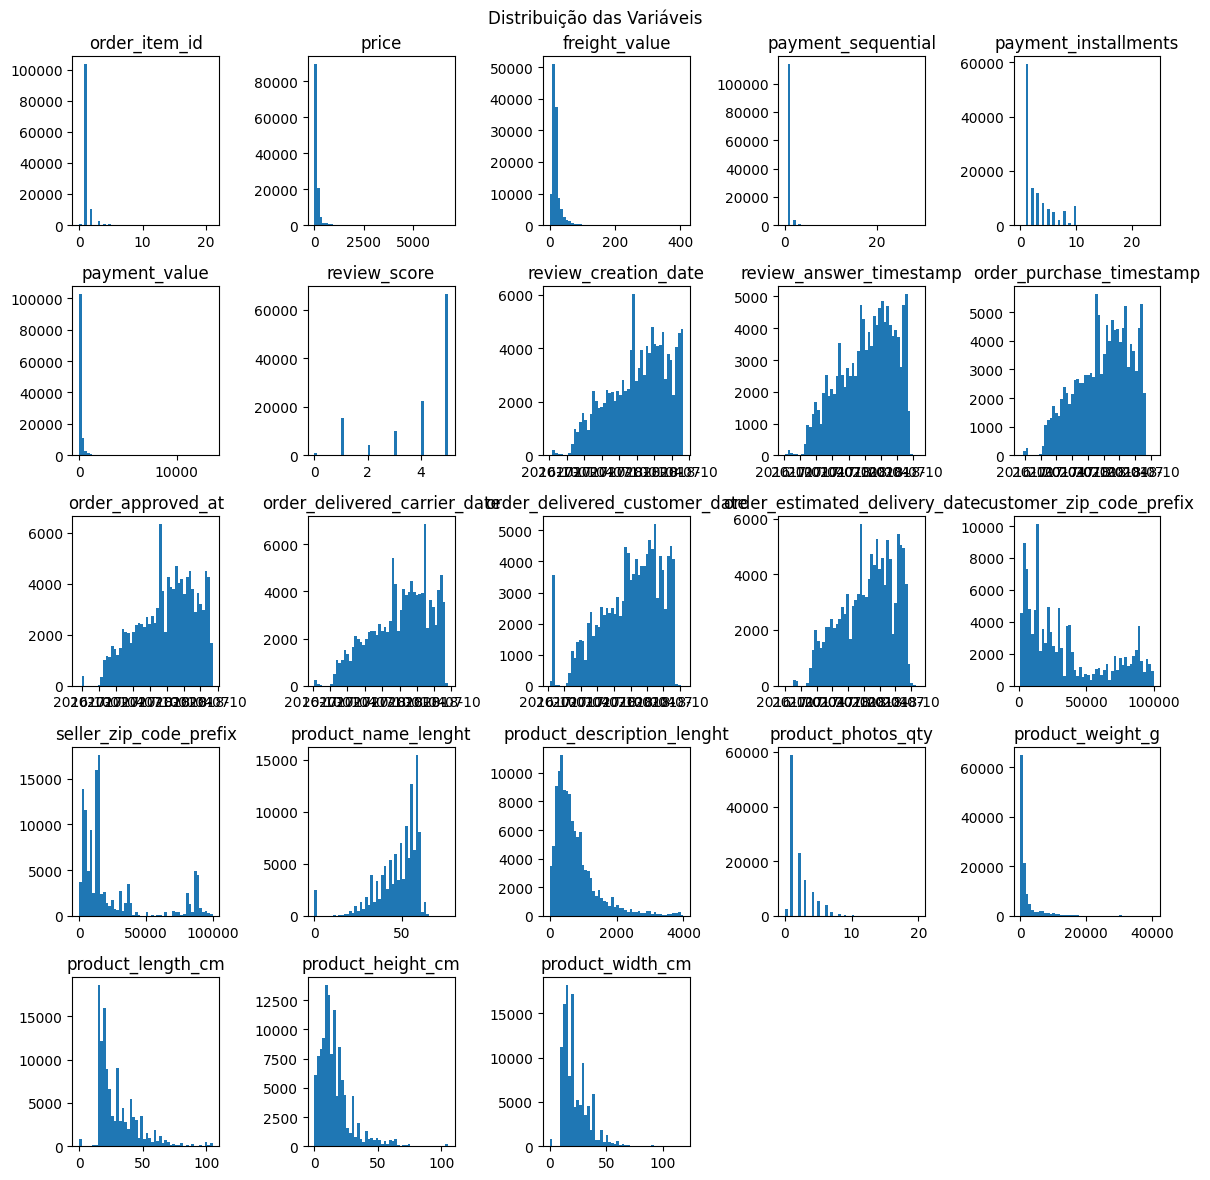

In [388]:
# Histograma para verificar a distribuição dos dados
plt.figure(figsize=(20, 18))
df_final.hist(bins=50, figsize=(12, 12), grid=False)
plt.suptitle('Distribuição das Variáveis')
plt.tight_layout()
plt.show()

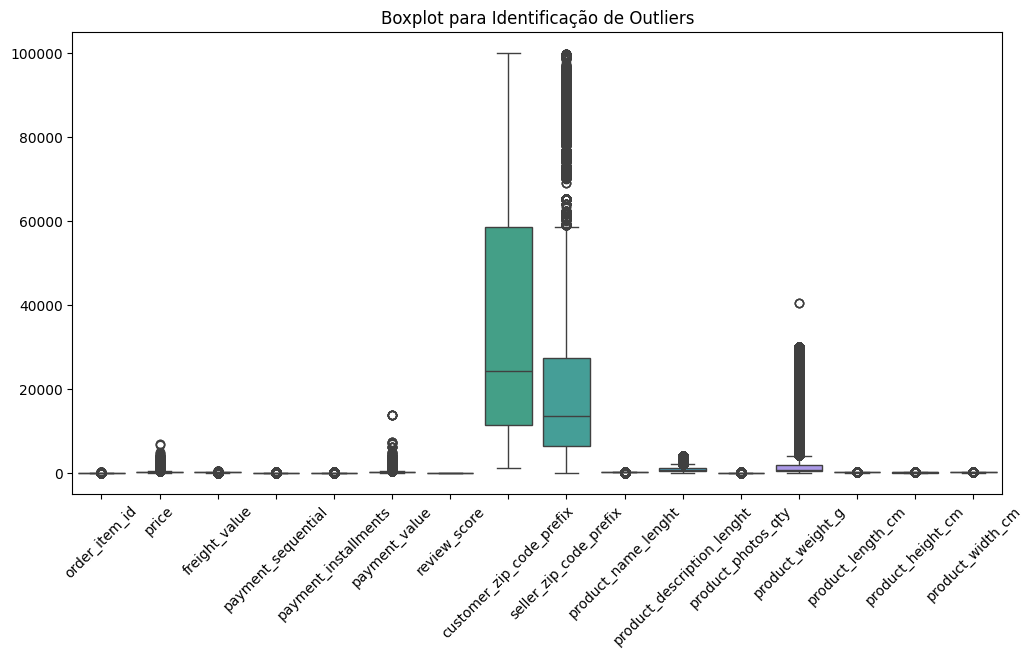

In [389]:
# Boxplot para identificar outliers em cada coluna
# Os pontos fora da caixa indicam outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final)
plt.title('Boxplot para Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()

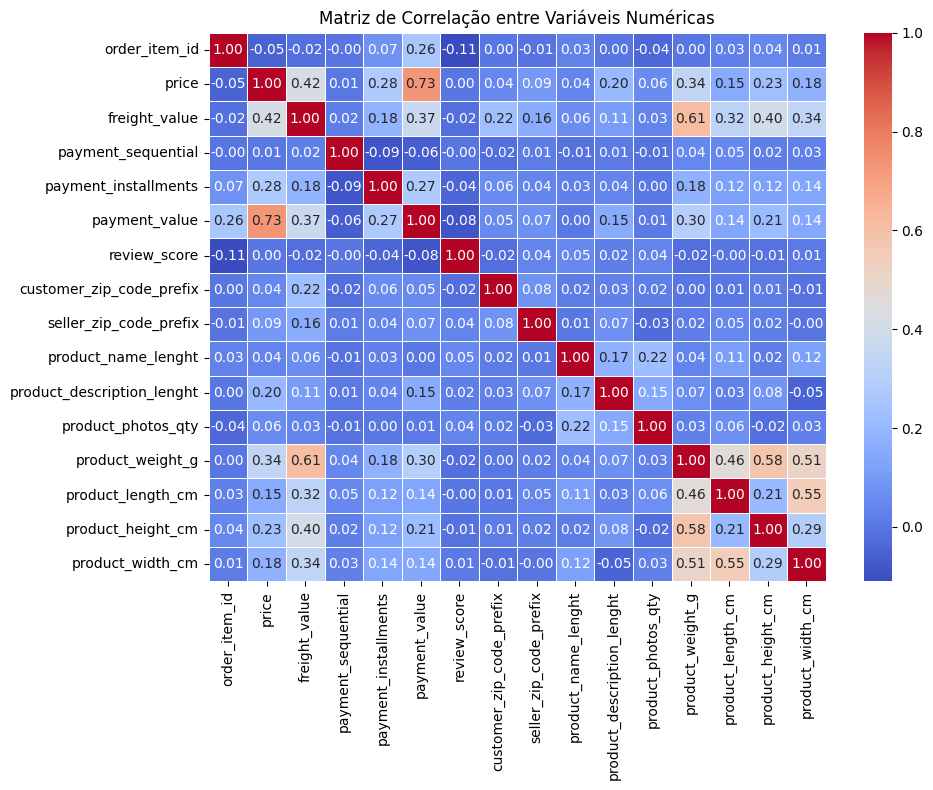

In [390]:
# Selecionar apenas colunas numéricas para verificar correlação
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])

# Matriz de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

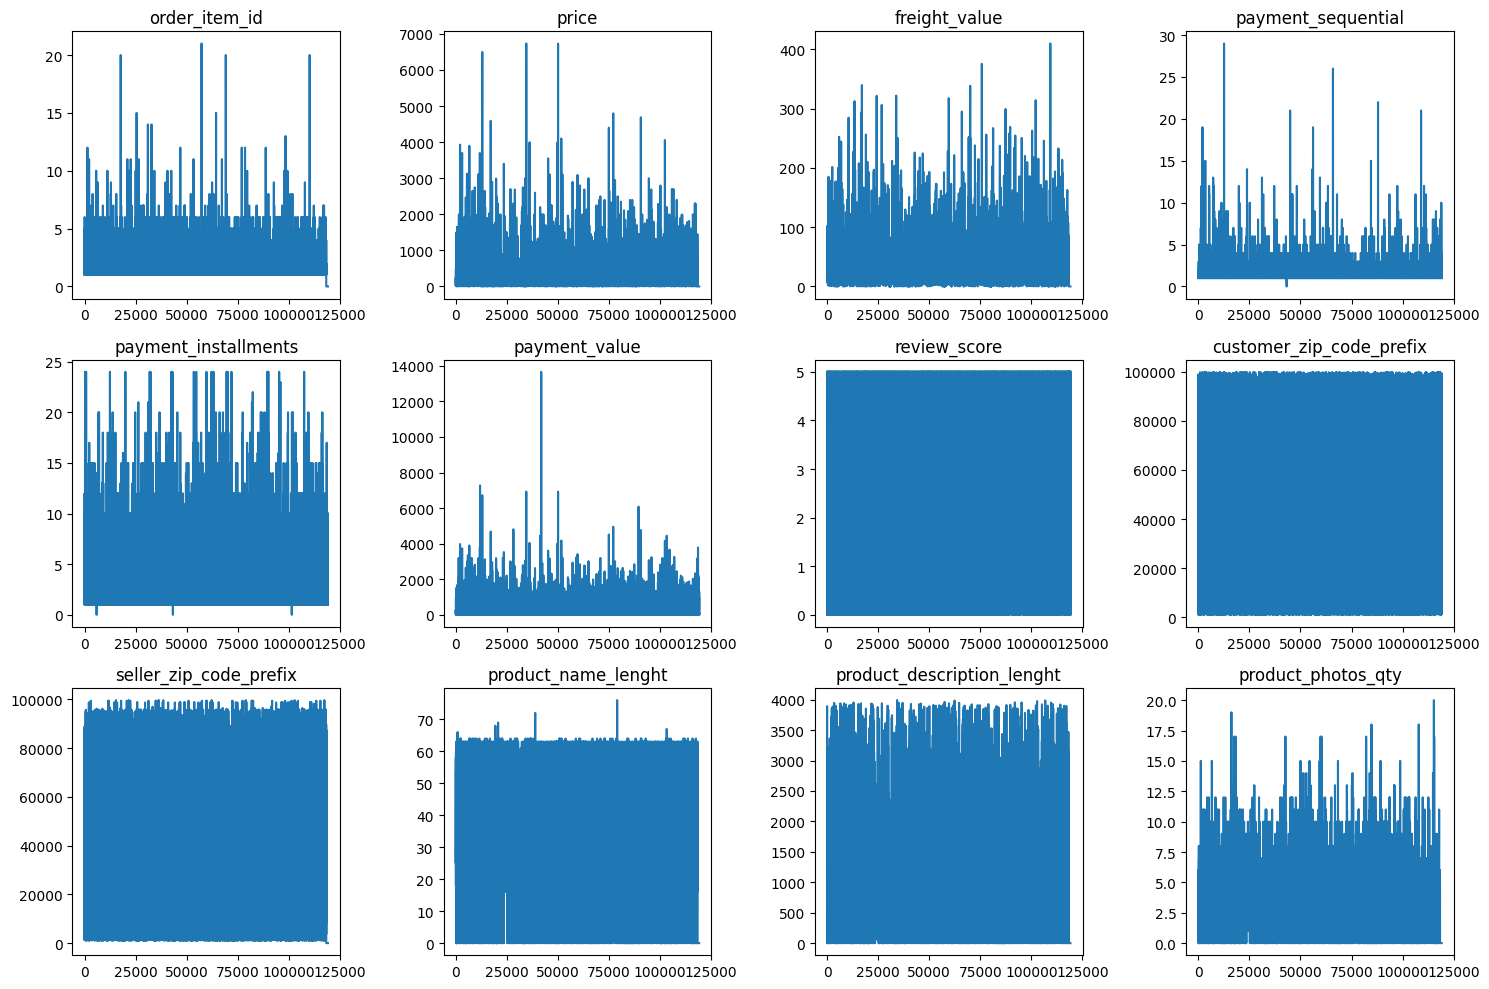

In [391]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Loop para plotar cada variável em seu respectivo subgráfico
for i, col in enumerate(df_numerico.columns[:12]):  # Considerando as primeiras 12 colunas
    df_numerico[col].plot(kind='line', ax=axes[i], title=col)

# Ajustar o layout para que não sobreponha os títulos e labels
plt.tight_layout()
plt.show()


##6. Volume de pedidos por mês

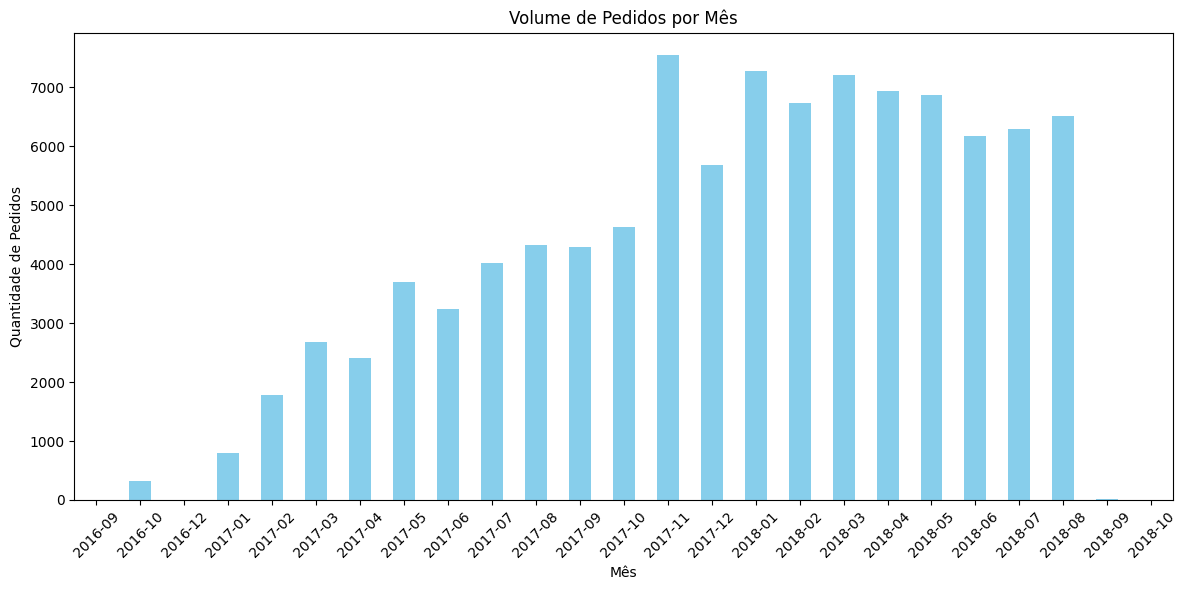

In [392]:
#Volume de pedidos por mês

#Aqui, primeiro converte-se a coluna de data de compra para o período mensal (ano e mês), para agrupar os dados por mês.
#Feito isso agrupa-se o DataFrame pelo mês e conta o número de pedidos únicos (order_id) em cada mês.
df_final['order_month'] = df_final['order_purchase_timestamp'].dt.to_period('M')
pedidos_por_mes = df_final.groupby('order_month')['order_id'].nunique()

plt.figure(figsize=(12, 6))
pedidos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Em relação a sazonalidade o gráfico de volume de pedidos por mês, entre setembro de 2016 e setembro de 2018, revela um padrão sazonal claro, com picos recorrentes em dezembro de cada ano, associados a períodos de festas como Natal e Réveillon, quando as vendas atingem seus maiores volumes. Além disso, observa-se uma queda consistente nos pedidos durante o primeiro trimestre (janeiro a março), possivelmente devido ao consumo reduzido após as compras de fim de ano. Essas variações regulares indicam sazonalidade, com períodos de alta e baixa demanda que se repetem anualmente, embora o volume geral de vendas apresente uma tendência de crescimento ao longo do período analisado.

##7. Distribuição do tempo de entrega dos pedidos


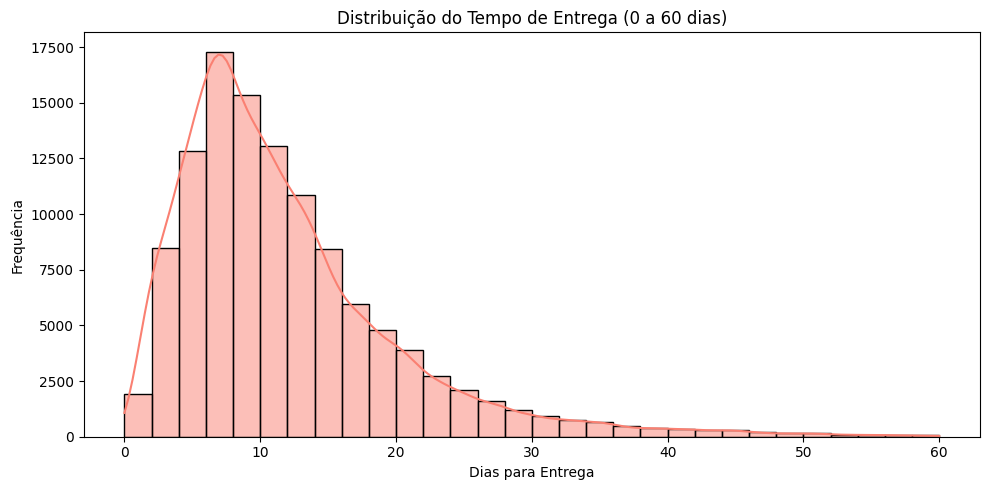

In [393]:
#Distribuição do tempo de entrega dos pedidos
#Calcula-se o tempo de entrega em dias subtraindo a data da compra da data em que o pedido foi entregue ao cliente.
df_final['tempo_entrega'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(df_final.loc[(df_final['tempo_entrega'] >= 0) & (df_final['tempo_entrega'] <= 60), 'tempo_entrega'], bins=30, kde=True, color='salmon')
plt.title('Distribuição do Tempo de Entrega (0 a 60 dias)')
plt.xlabel('Dias para Entrega')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

##8.Valor do frete X distância de entrega?

O df_final nao tem lat long, mas tem no df_geolocation que nao foi adicionado ao df_final. Utiliza-se portanto as informações que estão no df_geolocation, e assim calcula-se a distancia.


In [394]:
#faz um copia do geolocation
geo = df_geolocation.copy()

# Calcular média de lat e long para cada prefixo de CEP
geo_grouped = geo.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()


In [395]:
# Renomear colunas para evitar confusão
geo_grouped.columns = ['zip_code_prefix', 'lat', 'lng']

# Juntar latitude e longitude médias do cliente
df_final = df_final.merge(
    geo_grouped,
    left_on='customer_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
).rename(columns={'lat': 'customer_lat', 'lng': 'customer_lng'}).drop('zip_code_prefix', axis=1)

# Juntar latitude e longitude médias do vendedor
df_final = df_final.merge(
    geo_grouped,
    left_on='seller_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
).rename(columns={'lat': 'seller_lat', 'lng': 'seller_lng'}).drop('zip_code_prefix', axis=1)

In [396]:
# Função para calcular distância
def calculo_distancia(lat1, lon1, lat2, lon2):
    R = 6371  # raio da Terra em km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calcular a distância em km para cada linha
df_final['distance_km'] = calculo_distancia(
    df_final['customer_lat'], df_final['customer_lng'],
    df_final['seller_lat'], df_final['seller_lng']
)

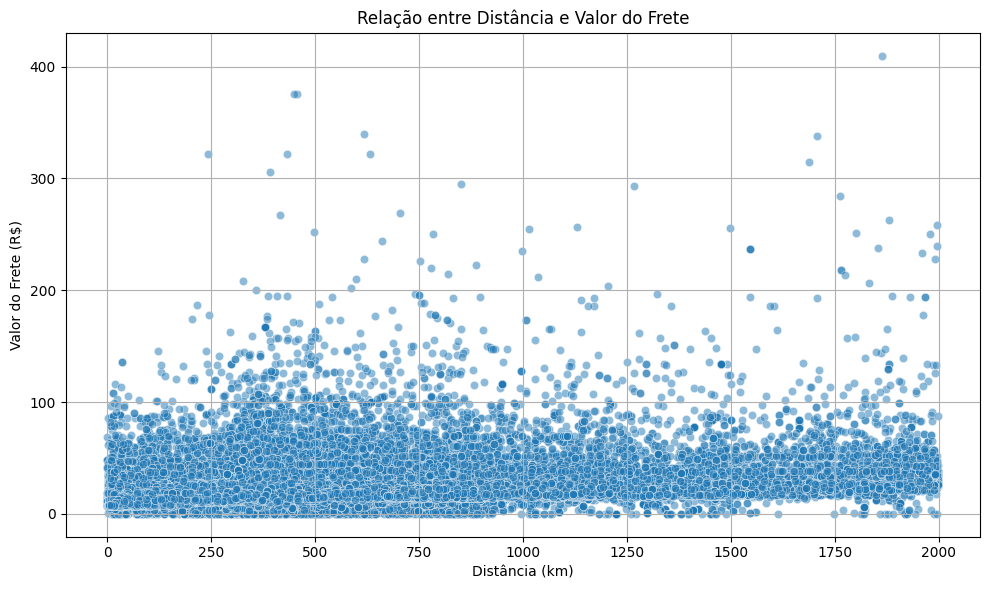

In [397]:
#Removervalores extremos para melhorar a visualização
df_plot = df_final[(df_final['distance_km'] < 2000) & (df_final['freight_value'] < 500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='distance_km', y='freight_value', alpha=0.5)
plt.title('Relação entre Distância e Valor do Frete')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

##9. Categorias de produtos mais vendidas em termos de faturamento

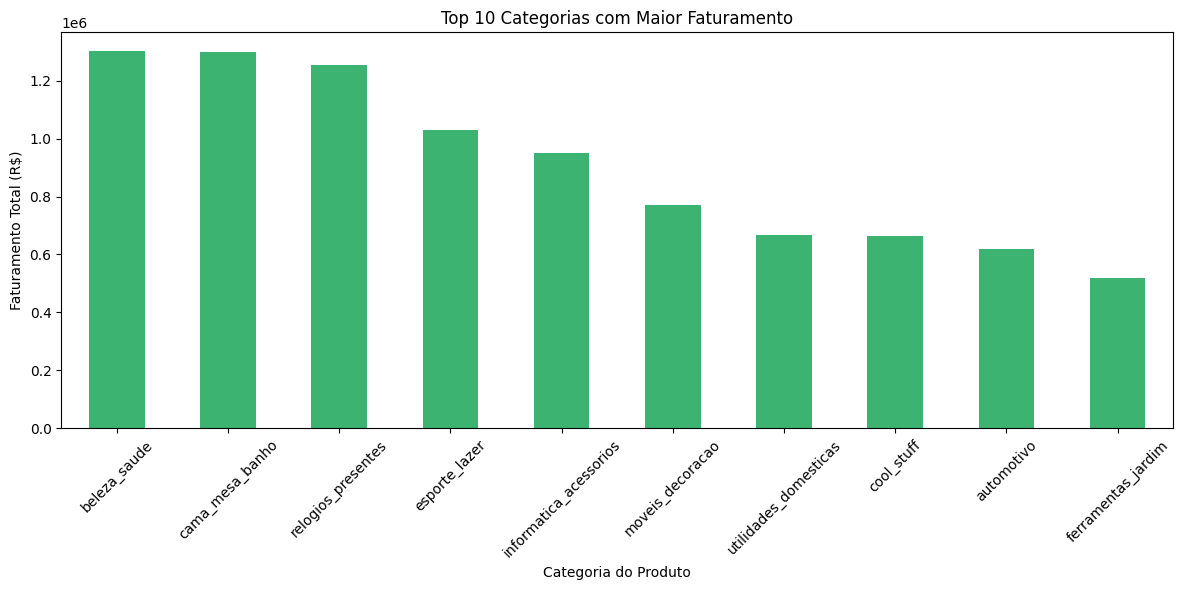

In [398]:
#Categorias de produtos mais vendidas em termos de faturamento
#Aqui agrupa-se o DataFrame pela categoria do produto somando o preço total de cada categoria.
#Feito isso, ordena-se de forma decrescente para obter as categorias que mais faturaram. Por fim, faz-se o plot.

faturamento_categoria = df_final.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
faturamento_categoria.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Categorias com Maior Faturamento')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##10.  Estados brasileiros que possuem o maior valor médio de pedido

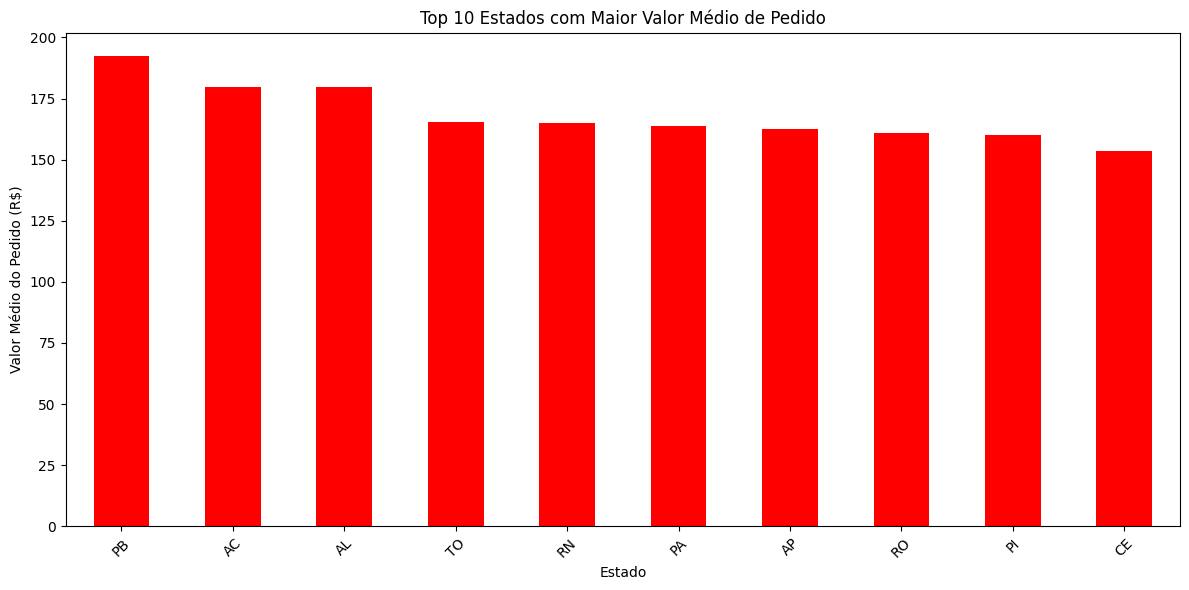

In [399]:
# estados brasileiros que possuem o maior valor médio de pedido
#Aqui, agrupa-se DataFrame pelo estado do cliente e calcula-se a média dos preços dos pedidos em cada estado.
#Assim, Ordena-se para obter os 10 estados com maior valor médio.
valor_medio_estado = df_final.groupby('customer_state')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
valor_medio_estado.plot(kind='bar', color='red')
plt.title('Top 10 Estados com Maior Valor Médio de Pedido')
plt.xlabel('Estado')
plt.ylabel('Valor Médio do Pedido (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##11.  Análise de Retenção.

**Análise de Retenção:** Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no período analisado. Quais insights podemos extrair destes dados?



In [400]:
#Conta-se quantos pedidos cada cliente fez usando o campo customer_unique_id.
#Considera-se cliente recorrente aquele que fez mais de um pedido.

clientes_pedidos = df_final.groupby('customer_unique_id')['order_id'].nunique()
clientes_recorrentes = clientes_pedidos[clientes_pedidos > 1].count()
clientes_unicos = clientes_pedidos.count()
taxa_recorrencia = clientes_recorrentes / clientes_unicos
print('Taxa de recorrencia igual a: ', taxa_recorrencia)

Taxa de recorrencia igual a:  0.031187562437562436


Insigths: Apenas 3,1% dos clientes realizaram mais de um pedido no período analisado.

A análise de retenção revelou que apenas 3,1% dos clientes realizaram mais de um pedido durante o período avaliado, o que indica uma taxa de recorrência bastante baixa. Esse resultado sugere que a maior parte dos consumidores realiza compras únicas, o que pode estar relacionado a diversos fatores, como o tipo de produto oferecido (itens de compra não frequente), a ausência de estratégias de fidelização, ou possíveis problemas de experiência do cliente, como atrasos na entrega ou atendimento insatisfatório. Esse cenário apresenta uma oportunidade significativa de melhoria: investir em ações de fidelização, como programas de recompensas, cupons de desconto para uma segunda compra e campanhas de e-mail marketing personalizadas, pode aumentar o engajamento e estimular novos pedidos. Além disso, é fundamental compreender melhor quem são os clientes recorrentes – analisando seus perfis, comportamentos e preferências – para que estratégias direcionadas possam ser aplicadas a consumidores com características semelhantes.

##12. Predição de atraso

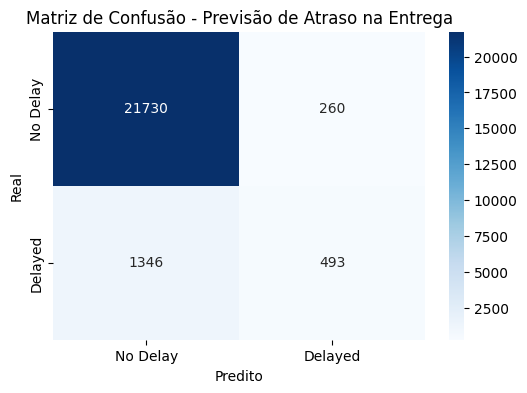

Acurácia: 93.26%

Relatório de Classificação:
              precision    recall  f1-score   support

    No Delay       0.94      0.99      0.96     21990
     Delayed       0.65      0.27      0.38      1839

    accuracy                           0.93     23829
   macro avg       0.80      0.63      0.67     23829
weighted avg       0.92      0.93      0.92     23829



In [401]:
df_modelo = df_final.copy()

# Criando a variável 'atrasado' (1 se atrasou, 0 se não atrasou)
df_modelo['atrasado'] = (df_modelo['order_delivered_customer_date'] > df_modelo['order_estimated_delivery_date']).astype(int)

# Definindo as features relevantes
features = [
    'price', 'freight_value', 'payment_value', 'payment_installments', 'review_score',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
]

# Removendo registros com valores nulos
df_modelo = df_modelo.dropna(subset=features + ['atrasado'])

# Separando X e y
X = df_modelo[features]
y = df_modelo['atrasado']

# Normalizando os dados
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

# Treinando modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo_rf.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
relatorio = classification_report(y_test, y_pred, output_dict=True)
matriz_confusao = confusion_matrix(y_test, y_pred)

# Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["No Delay", "Delayed"], yticklabels=["No Delay", "Delayed"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Previsão de Atraso na Entrega")
plt.show()

# Relatório resumido
print(f"Acurácia: {accuracy:.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["No Delay", "Delayed"]))

**Avaliação de performance:** O modelo atingiu uma acurácia de **93,26%,** indicando um bom desempenho geral na classificação das entregas como atrasadas ou não. No entanto, a análise mais detalhada revela um desbalanceamento de desempenho entre as classes: enquanto a classe "No Delay" apresenta alta precisão (0,94) e recall (0,99), a classe "Delayed" tem desempenho significativamente inferior, com precisão de apenas 0,65 e recall de 0,27. Isso significa que o modelo tem dificuldade em identificar corretamente as entregas atrasadas, classificando muitas delas incorretamente como pontuais. Apesar da alta acurácia geral, o baixo recall para atrasos sugere que o modelo não é confiável para aplicações que exigem alta sensibilidade na detecção de atrasos, sendo recomendável aplicar técnicas de balanceamento de classes ou ajustar os critérios de decisão para melhorar esse aspecto.

##13. Segmentação de Clientes

In [402]:
df_clientes = df_final.groupby('customer_unique_id').agg({
    'payment_value': 'sum',
    'freight_value': 'sum',
    'price': 'sum',
    'review_score': 'mean',
    'payment_installments': 'mean',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'})

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clientes)

# Clustering com KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clientes['cluster'] = kmeans.fit_predict(X_scaled)

In [403]:
df_cluster_analise = df_clientes.groupby('cluster').mean()
print(df_cluster_analise)

         payment_value  freight_value       price  review_score  \
cluster                                                           
0           152.522275      21.217978  119.937054      4.745620   
1          1689.221847     105.464204  890.047171      3.766323   
2           181.071572      23.078295  124.033784      1.815530   

         payment_installments  order_count  
cluster                                     
0                    2.779916     1.139431  
1                    5.132372     3.400116  
2                    2.948935     1.224821  


**Análise:**A segmentação identificou três perfis distintos de clientes: o Cluster 0 é composto por clientes econômicos que fazem poucas compras, pagam pouco e apresentam alta satisfação, sugerindo estratégias de fidelização leve e ofertas de combos econômicos; o Cluster 1 reúne clientes premium que gastam bastante, parcelam mais e realizam mais pedidos, porém com avaliações mais baixas, indicando a necessidade de melhorar a experiência de entrega e oferecer benefícios como frete grátis e atendimento personalizado; já o Cluster 2 agrupa clientes insatisfeitos com baixo gasto e poucas compras, demandando ações focadas em entender e corrigir suas reclamações, além de campanhas de reengajamento com descontos para recuperar a confiança e estimular novas compras.

##14. Análise de Satisfação


In [404]:
#Calculo da media por categoria
media_avaliacao_categoria = df_final.groupby('product_category_name')['review_score'].mean().sort_values()

# Média da avaliação vs tempo de entrega (em dias)
df_final['delivery_time_days'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.days
media_avaliacao_tempo = df_final.groupby('delivery_time_days')['review_score'].mean()

# Correlação entre avaliação, valor do pedido e tempo de entrega
correlacoes = df_final[['review_score', 'payment_value', 'delivery_time_days']].corr()

<ipython-input-405-59c1f9b63b80>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




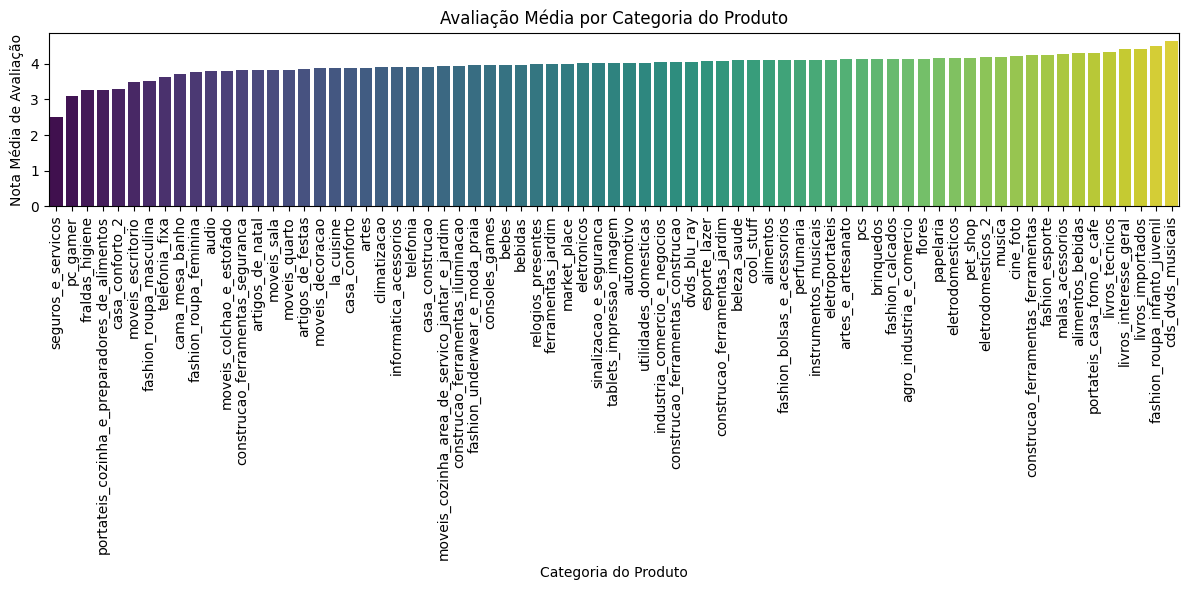

In [405]:
plt.figure(figsize=(12,6))
sns.barplot(x=media_avaliacao_categoria.index, y=media_avaliacao_categoria.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Avaliação Média por Categoria do Produto')
plt.ylabel('Nota Média de Avaliação')
plt.xlabel('Categoria do Produto')
plt.tight_layout()
plt.show()

**Analise**: A análise revela que categorias específicas de produtos apresentam diferenças na média de avaliações, indicando que alguns segmentos podem ter mais problemas ou expectativas diferentes.

##15. Visualização e dashboards

###Um dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto




In [406]:
from ipywidgets import interact

df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_month'] = df_final['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

def plot_vendas(estado, categoria):
    df_filtrado = df_final[(df_final['customer_state'] == estado) & (df_final['product_category_name'] == categoria)]
    vendas_mensais = df_filtrado.groupby('order_month')['payment_value'].sum().reset_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(data=vendas_mensais, x='order_month', y='payment_value')
    plt.title(f'Vendas em {estado} - Categoria: {categoria}')
    plt.xlabel('Mês')
    plt.ylabel('Valor Total de Vendas')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

estados = sorted(df_final['customer_state'].unique())
categorias = sorted(df_final['product_category_name'].unique())

interact(plot_vendas, estado=estados, categoria=categorias)

interactive(children=(Dropdown(description='estado', options=('AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', …

<function __main__.plot_vendas(estado, categoria)>

###Um mapa de calor mostrando a concentração de vendas por região/estado do Brasil



In [407]:
import requests
# Exemplo: seu df com vendas por estado
vendas_estado = df_final.groupby('customer_state')['payment_value'].sum().reset_index()

# Baixar geojson dos estados do Brasil
url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = requests.get(url_geojson).json()

# Conferir o formato das propriedades dos estados no geojson
# Normalmente, a propriedade é "sigla" ou "name"
for feature in br_states['features']:
    print(feature['properties'])

# Mapear sua coluna 'customer_state' para 'sigla' do geojson

# Criar o mapa
fig = px.choropleth(
    vendas_estado,
    geojson=br_states,
    locations='customer_state',
    featureidkey='properties.sigla',
    color='payment_value',
    color_continuous_scale='Viridis',
    labels={'payment_value': 'Total Vendas'},
    title='Concentração de Vendas por Estado - Brasil'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

{'id': 1, 'name': 'Acre', 'sigla': 'AC', 'regiao_id': '3', 'codigo_ibg': '12', 'cartodb_id': 1, 'created_at': '2015-02-09T16:46:01Z', 'updated_at': '2015-02-09T16:46:01Z'}
{'id': 2, 'name': 'Alagoas', 'sigla': 'AL', 'regiao_id': '4', 'codigo_ibg': '27', 'cartodb_id': 2, 'created_at': '2015-02-09T16:46:01Z', 'updated_at': '2015-02-09T16:46:01Z'}
{'id': 3, 'name': 'Amazonas', 'sigla': 'AM', 'regiao_id': '3', 'codigo_ibg': '13', 'cartodb_id': 3, 'created_at': '2015-02-09T16:46:01Z', 'updated_at': '2015-02-09T16:46:01Z'}
{'id': 4, 'name': 'Amapá', 'sigla': 'AP', 'regiao_id': '3', 'codigo_ibg': '16', 'cartodb_id': 4, 'created_at': '2015-02-09T16:46:01Z', 'updated_at': '2015-02-09T16:46:01Z'}
{'id': 5, 'name': 'Bahia', 'sigla': 'BA', 'regiao_id': '4', 'codigo_ibg': '29', 'cartodb_id': 5, 'created_at': '2015-02-09T16:46:01Z', 'updated_at': '2015-02-09T16:46:01Z'}
{'id': 6, 'name': 'Ceará', 'sigla': 'CE', 'regiao_id': '4', 'codigo_ibg': '23', 'cartodb_id': 6, 'created_at': '2015-02-09T16:46:01

###Um conjunto de gráficos que apresente a relação entre avaliação do cliente e tempo de entrega



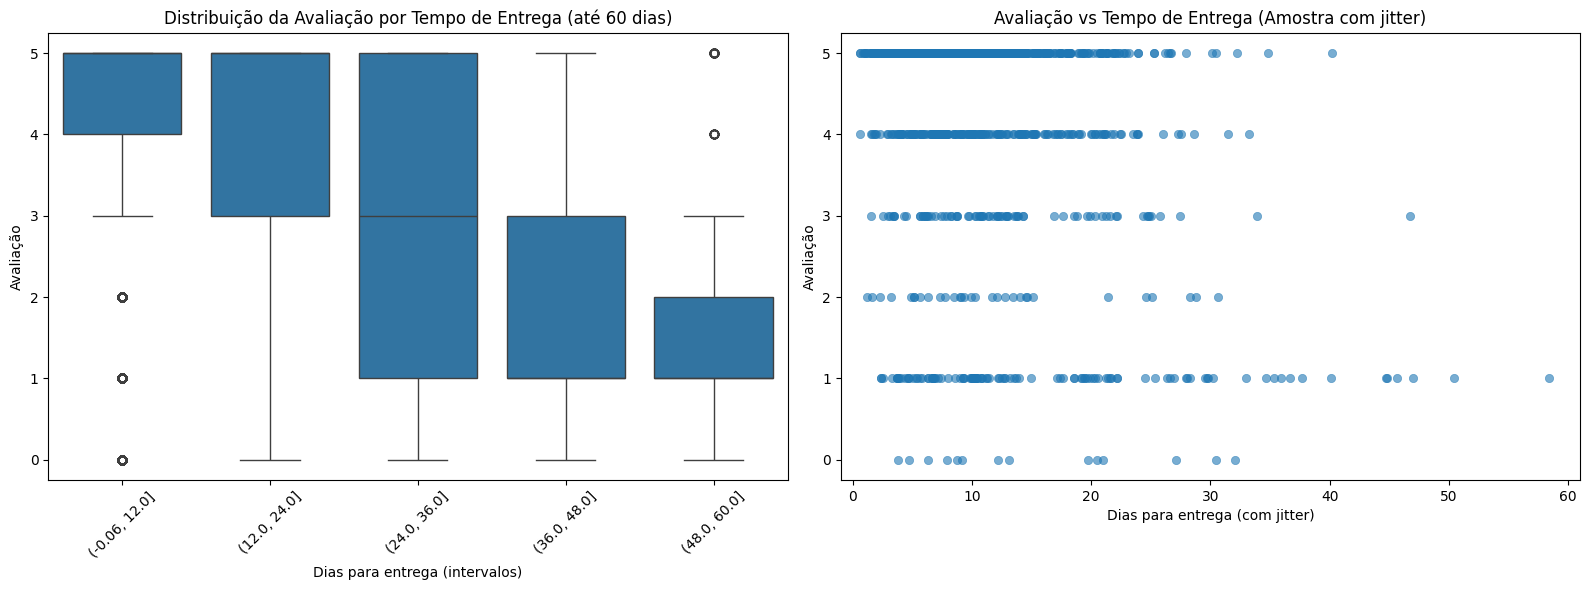

In [408]:
# Filtrar para delivery_time_days >= 0 e <= 60 para foco na faixa relevante
df_filtered = df_final[(df_final['delivery_time_days'] >= 0) & (df_final['delivery_time_days'] <= 60)]

fig, axs = plt.subplots(1, 2, figsize=(16,6))

# Boxplot com menos bins e labels legíveis
bins = pd.cut(df_filtered['delivery_time_days'], bins=5)
sns.boxplot(x=bins, y='review_score', data=df_filtered, ax=axs[0])
axs[0].set_title('Distribuição da Avaliação por Tempo de Entrega (até 60 dias)')
axs[0].set_xlabel('Dias para entrega (intervalos)')
axs[0].set_ylabel('Avaliação')
axs[0].tick_params(axis='x', rotation=45)

# Scatter plot com jitter para evitar sobreposição
sample = df_filtered.sample(min(1000, len(df_filtered)), random_state=42).copy()
jitter = np.random.uniform(-0.5, 0.5, size=sample.shape[0])
sample['delivery_time_days_jitter'] = sample['delivery_time_days'] + jitter

sns.scatterplot(x='delivery_time_days_jitter', y='review_score', data=sample, ax=axs[1], alpha=0.6, edgecolor=None)
axs[1].set_title('Avaliação vs Tempo de Entrega (Amostra com jitter)')
axs[1].set_xlabel('Dias para entrega (com jitter)')
axs[1].set_ylabel('Avaliação')
axs[1].set_xlim(-1, 61)  # Para focar no intervalo de interesse

plt.tight_layout()
plt.show()

###Um dashboard de análise dos vendedores, mostrando quais têm melhor desempenho em termos de volume de vendas, satisfação do cliente e tempo de entrega

In [409]:
# Converter para datetime (caso ainda não tenha feito)
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])

# Calcular tempo de entrega em dias
df_final['delivery_time_days'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.days

# Remover linhas com valores nulos e com delivery_time_days negativo ou zero (tempo inválido)
df_vendedores = df_final.dropna(subset=['payment_value', 'review_score', 'delivery_time_days', 'seller_id'])
df_vendedores = df_vendedores[df_vendedores['delivery_time_days'] > 0]

# Agrupar por vendedor
vendedores_agg = df_vendedores.groupby('seller_id').agg({
    'payment_value': 'sum',
    'review_score': 'mean',
    'delivery_time_days': 'mean'
}).reset_index()

# Plotar gráfico
fig = px.scatter(
    vendedores_agg,
    x='payment_value',
    y='review_score',
    size='delivery_time_days',
    hover_name='seller_id',
    title='Desempenho dos Vendedores',
    labels={
        'payment_value': 'Volume de Vendas',
        'review_score': 'Satisfação Média',
        'delivery_time_days': 'Tempo Médio de Entrega (dias)'
    },
    size_max=20
)

fig.show()

In [411]:
#solucao para colocar no github
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
